# Analyzing Taylor Swift lyrics with NLP

#### In this notebook we will analyze lyric data from Taylor Swift's albums. The goal is to perform NLP techniques and understand what language she uses in her songs, and what has changed over time.
#### Data is retrieved from [kaggle](https://www.kaggle.com/datasets/thespacefreak/taylor-swift-song-lyrics-all-albums)


### Questions to explore:
1. how does sentiment evolve album by album? within albums?
2. is song #5 really the saddest?
3. what are the most frequently used words? which words carry the most weight? how do they change over time?
    - wordclouds
4. what are the themes in each album? song?
5. how do the sentiment scores relate to the spotify stats about that song?

In [6]:
## Imports
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, Range1d, HoverTool, Legend
from bokeh.models.widgets import Tabs, Panel
from bokeh.io import show
from bokeh.palettes import Category20b, Spectral, Plasma, Viridis, YlOrRd, PuOr, BuPu, BuGn, brewer, GnBu, PRGn, Inferno256, PuRd, RdPu, PiYG, RdYlGn, YlGnBu
from bokeh.io import reset_output, output_notebook
reset_output()
output_notebook()
import glob

Loading BokehJS ...

## Load the data

First we load the datasets of lyrics. There is one csv per album that we concatenate into a master dataframe by looping through all the files in our lyrics folder, adjusted from [this code.](https://sparkbyexamples.com/pandas/pandas-read-multiple-csv-files/)


The data contains one row per line of each song, totalling 8358 lines of lyrics!

In [7]:
# Get CSV files list from a folder
path = "./lyrics"
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df   = pd.concat(df_list, ignore_index=True)

In [8]:
df

,album_name,track_title,track_n,lyric,line
0,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,There's something 'bout the way,1
1,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,The street looks when it's just rained,2
2,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"There's a glow off the pavement, you walk me t...",3
3,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,And you know I wanna ask you to dance right there,4
4,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"In the middle of the parking lot, yeah",5
...,...,...,...,...,...
8353,Speak Now (Deluxe),Superman,17,I'll be right here on the ground,51
8354,Speak Now (Deluxe),Superman,17,When you come back down,52
8355,Speak Now (Deluxe),Superman,17,"La, la, la, la, la, la",53
8356,Speak Now (Deluxe),Superman,17,"La, la, la, la, la, la",54


There is one row per line of lyrics per each song. Each row contains the album name, track title, track number in the album, lyric, and the line number.

## Clean the data

nahhh dont think we need to

basic plots for exploring - to be removed

<AxesSubplot:>

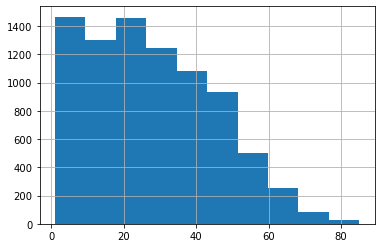

In [13]:
df.line.hist()

<AxesSubplot:>

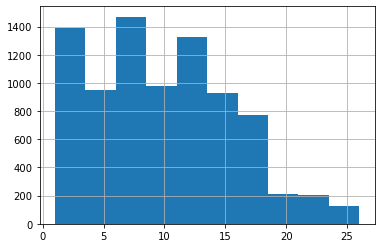

In [12]:
df.track_n.hist()

# Preprocessing ??

Preprocess to add more columns with text analysis stuff? or we keep each line as-is to do vader on it?

dfs we need:
1. the initial one with one row per line
2. df with one row per song with the avg sentiment values
3. df with one row per song with the song contained in another column(?)